In [109]:
import pandas as pd

In [121]:
import pandas as pd

df = pd.read_parquet("hf://datasets/gorkemsevinc/customer_support_tickets/data/train-00000-of-00001.parquet")

d:\Coding\astudio_test\Customer-Support-Ticket-Processing-System\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [126]:
df = pd.read_csv('archive.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [127]:
df['Ticket Type'].value_counts()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

In [128]:
df['Ticket Priority'].value_counts()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

In [4]:
df_new = df[['Ticket ID', 'Ticket Subject', 'Ticket Description', 'Ticket Priority']]
df_new.head(10)

,Ticket ID,Ticket Subject,Ticket Description,Ticket Priority
0,1,Product setup,I'm having an issue with the {product_purchase...,Critical
1,2,Peripheral compatibility,I'm having an issue with the {product_purchase...,Critical
2,3,Network problem,I'm facing a problem with my {product_purchase...,Low
3,4,Account access,I'm having an issue with the {product_purchase...,Low
4,5,Data loss,I'm having an issue with the {product_purchase...,Low
5,6,Payment issue,I'm facing a problem with my {product_purchase...,Low
6,7,Refund request,I'm unable to access my {product_purchased} ac...,Critical
7,8,Battery life,I'm having an issue with the {product_purchase...,Critical
8,9,Installation support,I'm having an issue with the {product_purchase...,Low
9,10,Payment issue,My {product_purchased} is making strange noise...,Critical


In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ticket ID           8469 non-null   int64 
 1   Ticket Subject      8469 non-null   object
 2   Ticket Description  8469 non-null   object
 3   Ticket Priority     8469 non-null   object
dtypes: int64(1), object(3)
memory usage: 264.8+ KB


In [6]:
df_low = df_new[df_new['Ticket Priority'] == 'Low']
df_medium = df_new[df_new['Ticket Priority'] == 'Medium']
df_high = df_new[df_new['Ticket Priority'] == 'High']
df_critical = df_new[df_new['Ticket Priority'] == 'Critical']

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [36]:
import re

In [ ]:
stopwords = set(STOPWORDS)

In [99]:
comment_words = {}
# iterate through the csv file
datas = [df_low, df_medium, df_high, df_critical]
label = ['low', 'medium', 'high', 'critical']
for idx, data in enumerate(datas):
	comment_words[label[idx]] = ''
	for val in data['Ticket Subject']:
		
		# typecaste each val to string
		val = str(val)
		val = re.sub(r"\{.*?\}", "", val)
		val = re.sub(r"\b(?:compatibility|product|problem|request|issue|network)\b", "", val, flags=re.IGNORECASE).strip()

		# split the value
		tokens = val.split()
		
		# Converts each token into lowercase
		for i in range(len(tokens)):
			tokens[i] = tokens[i].lower()
		
		comment_words[label[idx]] += " ".join(tokens)+" "

In [100]:
comment_words

{'low': ' account access data loss payment installation support hardware setup software bug refund cancellation setup installation support installation support hardware cancellation delivery  peripheral display delivery software bug display peripheral installation support hardware installation support software bug installation support battery life cancellation cancellation cancellation software bug  battery life data loss battery life  account access delivery delivery hardware setup  setup refund software bug  delivery display battery life delivery software bug battery life display battery life recommendation recommendation recommendation display software bug delivery  installation support battery life recommendation  software bug hardware software bug payment setup payment  peripheral cancellation cancellation battery life hardware delivery recommendation data loss cancellation cancellation battery life hardware account access software bug installation support refund hardware peripher

In [93]:
wordcloud_low = WordCloud(width = 400, height = 200,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words['low'])
wordcloud_medium = WordCloud(width = 400, height = 200,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words['medium'])
wordcloud_high = WordCloud(width = 400, height = 200,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words['high'])
wordcloud_critical = WordCloud(width = 400, height = 200,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words['critical'])

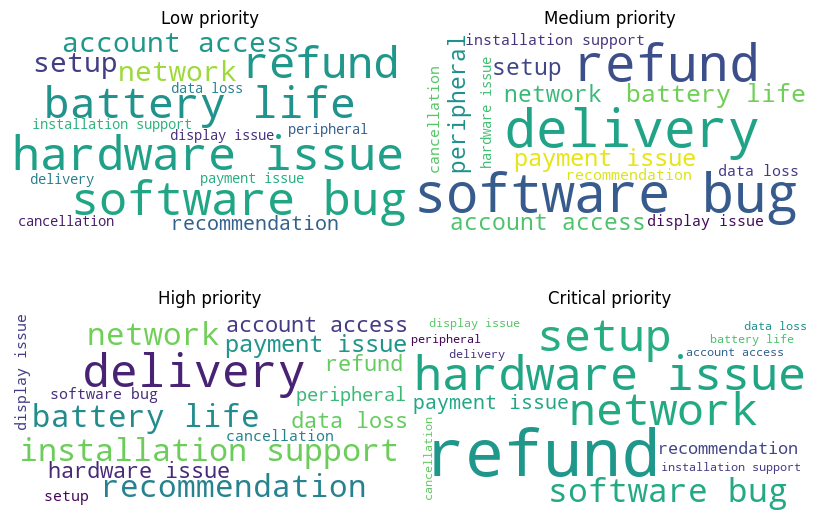

In [94]:
# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None)
plt.subplot(2,2,1)
plt.imshow(wordcloud_low)
plt.axis("off")
plt.title('Low priority')
plt.tight_layout(pad = 0)

plt.subplot(2,2,2)
plt.imshow(wordcloud_medium)
plt.axis("off")
plt.title('Medium priority')
plt.tight_layout(pad = 0)

plt.subplot(2,2,3)
plt.imshow(wordcloud_high)
plt.axis("off")
plt.title('High priority')
plt.tight_layout(pad = 0)

plt.subplot(2,2,4)
plt.imshow(wordcloud_critical)
plt.axis("off")
plt.title('Critical priority')
plt.tight_layout(pad = 0)

plt.show()

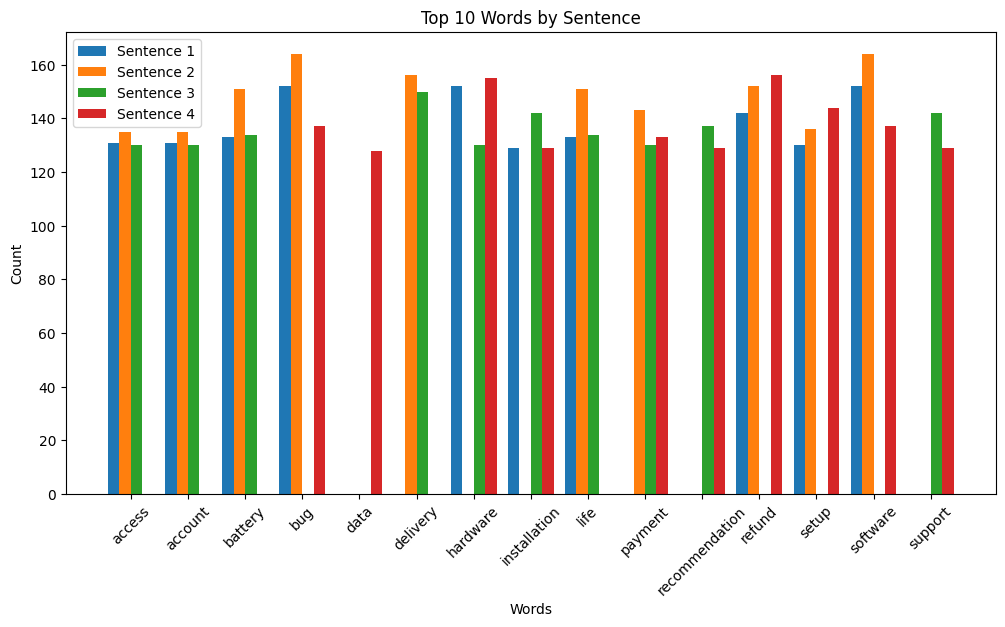

In [103]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import numpy as np

def plot_top_words_by_sentence(text_list, top_n=10):
    all_word_counts = []
    sentence_labels = []
    
    for i, sentence in enumerate(text_list, start=1):
        # Convert to lowercase and extract words
        words = re.findall(r'\b\w+\b', sentence.lower())
        
        # Count word occurrences
        word_counts = Counter(words)
        
        # Get the top N most common words
        most_common = word_counts.most_common(top_n)
        
        # Store results if there are words
        if most_common:
            all_word_counts.append(dict(most_common))
            sentence_labels.append(f"Sentence {i}")

    # Get all unique words appearing in any sentence
    unique_words = sorted(set(word for wc in all_word_counts for word in wc))

    # Create a word count matrix (rows: sentences, columns: words)
    word_matrix = np.zeros((len(all_word_counts), len(unique_words)))

    for i, word_counts in enumerate(all_word_counts):
        for j, word in enumerate(unique_words):
            word_matrix[i, j] = word_counts.get(word, 0)

    # Plot
    x = np.arange(len(unique_words))  # Word positions on X-axis
    width = 0.2  # Width of each bar
    
    plt.figure(figsize=(12, 6))

    for i in range(len(all_word_counts)):
        plt.bar(x + i * width, word_matrix[i], width, label=sentence_labels[i])

    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.title(f"Top {top_n} Words by Sentence")
    plt.xticks(x + (width * (len(all_word_counts) - 1)) / 2, unique_words, rotation=45)
    plt.legend()
    plt.show()

# Example usage
text_list = [
    comment_words['low'],
    comment_words['medium'],
    comment_words['high'],
    comment_words['critical'],
]

plot_top_words_by_sentence(text_list)

In [106]:
set(comment_words['low'].split())

{'access',
 'account',
 'battery',
 'bug',
 'cancellation',
 'data',
 'delivery',
 'display',
 'hardware',
 'installation',
 'life',
 'loss',
 'payment',
 'peripheral',
 'recommendation',
 'refund',
 'setup',
 'software',
 'support'}

In [107]:
set(comment_words['medium'].split())

{'access',
 'account',
 'battery',
 'bug',
 'cancellation',
 'data',
 'delivery',
 'display',
 'hardware',
 'installation',
 'life',
 'loss',
 'payment',
 'peripheral',
 'recommendation',
 'refund',
 'setup',
 'software',
 'support'}

In [108]:
set(comment_words['high'].split())

{'access',
 'account',
 'battery',
 'bug',
 'cancellation',
 'data',
 'delivery',
 'display',
 'hardware',
 'installation',
 'life',
 'loss',
 'payment',
 'peripheral',
 'recommendation',
 'refund',
 'setup',
 'software',
 'support'}